In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

In [3]:
from tqdm import tqdm

import torch
import torch.nn as nn
import torch.optim as optim

import torchvision
#import torchvision.transforms as transforms
from torchsummary import summary

from data import get_data_loader
from model import Net
from train import train, eval
from resnet import ResNet18

In [4]:
Net = ResNet18

In [5]:
trainloader, testloader, classes = get_data_loader()

Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


plane   dog  deer  deer truck   cat truck truck   cat   cat plane horse plane   dog   dog  deer   car   car  frog   car  frog   dog  ship   cat   car  frog  deer  bird  deer  bird   cat horse   car   cat   cat  ship horse plane plane plane truck plane  frog horse  ship  deer  bird plane   cat   dog  bird truck   dog   cat  deer   dog   dog  frog horse  frog  ship  deer plane truck


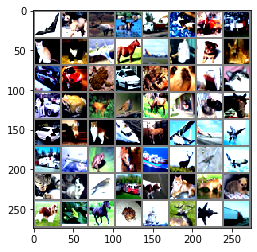

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(len(images))))

In [7]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
net = Net().to(device)
summary(net, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

In [8]:
model =  Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

train_losses = []
test_losses = []
train_acc = []
test_acc = []

EPOCHS = 40
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model, device, trainloader, optimizer, epoch,train_losses, train_acc)
    eval(model, device, testloader, test_losses, test_acc)

  0%|          | 0/782 [00:00<?, ?it/s]

EPOCH: 0


Loss=0.7121666669845581 Batch_id=781 Accuracy=52.84: 100%|██████████| 782/782 [00:34<00:00, 22.52it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.9913, Accuracy: 6501/10000 (65.01%)

EPOCH: 1


Loss=0.8251345157623291 Batch_id=781 Accuracy=72.99: 100%|██████████| 782/782 [00:35<00:00, 22.30it/s] 
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6684, Accuracy: 7717/10000 (77.17%)

EPOCH: 2


Loss=0.8457353711128235 Batch_id=781 Accuracy=79.80: 100%|██████████| 782/782 [00:35<00:00, 22.17it/s] 
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7440, Accuracy: 7590/10000 (75.90%)

EPOCH: 3


Loss=0.6825367212295532 Batch_id=781 Accuracy=83.94: 100%|██████████| 782/782 [00:36<00:00, 21.69it/s] 
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5965, Accuracy: 8074/10000 (80.74%)

EPOCH: 4


Loss=0.34436869621276855 Batch_id=781 Accuracy=86.40: 100%|██████████| 782/782 [00:36<00:00, 21.49it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5621, Accuracy: 8135/10000 (81.35%)

EPOCH: 5


Loss=0.10813926160335541 Batch_id=781 Accuracy=88.66: 100%|██████████| 782/782 [00:36<00:00, 21.35it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4817, Accuracy: 8399/10000 (83.99%)

EPOCH: 6


Loss=0.5334150791168213 Batch_id=781 Accuracy=90.26: 100%|██████████| 782/782 [00:36<00:00, 21.21it/s] 
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4613, Accuracy: 8494/10000 (84.94%)

EPOCH: 7


Loss=0.1303480565547943 Batch_id=781 Accuracy=92.15: 100%|██████████| 782/782 [00:36<00:00, 21.16it/s] 
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4801, Accuracy: 8474/10000 (84.74%)

EPOCH: 8


Loss=0.2120417058467865 Batch_id=781 Accuracy=93.38: 100%|██████████| 782/782 [00:36<00:00, 21.22it/s]  
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5412, Accuracy: 8319/10000 (83.19%)

EPOCH: 9


Loss=0.284087598323822 Batch_id=781 Accuracy=94.28: 100%|██████████| 782/782 [00:37<00:00, 21.12it/s]   
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4931, Accuracy: 8531/10000 (85.31%)

EPOCH: 10


Loss=0.44444382190704346 Batch_id=781 Accuracy=95.26: 100%|██████████| 782/782 [00:36<00:00, 21.23it/s] 
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5361, Accuracy: 8515/10000 (85.15%)

EPOCH: 11


Loss=0.11373212933540344 Batch_id=781 Accuracy=95.86: 100%|██████████| 782/782 [00:36<00:00, 21.22it/s] 
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5361, Accuracy: 8473/10000 (84.73%)

EPOCH: 12


Loss=0.016210734844207764 Batch_id=781 Accuracy=96.57: 100%|██████████| 782/782 [00:37<00:00, 21.09it/s] 
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5010, Accuracy: 8646/10000 (86.46%)

EPOCH: 13


Loss=0.019889533519744873 Batch_id=781 Accuracy=97.14: 100%|██████████| 782/782 [00:36<00:00, 21.15it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5956, Accuracy: 8526/10000 (85.26%)

EPOCH: 14


Loss=0.29497644305229187 Batch_id=781 Accuracy=97.57: 100%|██████████| 782/782 [00:37<00:00, 21.08it/s] 
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6002, Accuracy: 8597/10000 (85.97%)

EPOCH: 15


Loss=0.0016740262508392334 Batch_id=781 Accuracy=97.88: 100%|██████████| 782/782 [00:37<00:00, 21.11it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5565, Accuracy: 8639/10000 (86.39%)

EPOCH: 16


Loss=0.2603939175605774 Batch_id=781 Accuracy=98.35: 100%|██████████| 782/782 [00:37<00:00, 21.06it/s]   
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5516, Accuracy: 8670/10000 (86.70%)

EPOCH: 17


Loss=0.8131665587425232 Batch_id=781 Accuracy=98.18: 100%|██████████| 782/782 [00:37<00:00, 21.01it/s]   
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6110, Accuracy: 8618/10000 (86.18%)

EPOCH: 18


Loss=0.180183544754982 Batch_id=781 Accuracy=98.14: 100%|██████████| 782/782 [00:37<00:00, 21.05it/s]    
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6302, Accuracy: 8518/10000 (85.18%)

EPOCH: 19


Loss=0.01721024513244629 Batch_id=781 Accuracy=98.72: 100%|██████████| 782/782 [00:37<00:00, 21.07it/s]  
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5618, Accuracy: 8757/10000 (87.57%)

EPOCH: 20


Loss=0.05412071943283081 Batch_id=781 Accuracy=99.02: 100%|██████████| 782/782 [00:37<00:00, 21.01it/s]  
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5952, Accuracy: 8721/10000 (87.21%)

EPOCH: 21


Loss=0.009551674127578735 Batch_id=781 Accuracy=99.07: 100%|██████████| 782/782 [00:37<00:00, 21.03it/s] 
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5967, Accuracy: 8708/10000 (87.08%)

EPOCH: 22


Loss=0.016406893730163574 Batch_id=781 Accuracy=99.08: 100%|██████████| 782/782 [00:37<00:00, 21.01it/s]  
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5970, Accuracy: 8696/10000 (86.96%)

EPOCH: 23


Loss=0.005398571491241455 Batch_id=781 Accuracy=99.29: 100%|██████████| 782/782 [00:37<00:00, 20.98it/s]  
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6025, Accuracy: 8771/10000 (87.71%)

EPOCH: 24


Loss=0.08488678932189941 Batch_id=781 Accuracy=99.48: 100%|██████████| 782/782 [00:37<00:00, 20.98it/s]  
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6464, Accuracy: 8717/10000 (87.17%)

EPOCH: 25


Loss=0.006273627281188965 Batch_id=781 Accuracy=99.25: 100%|██████████| 782/782 [00:37<00:00, 21.03it/s]  
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6699, Accuracy: 8726/10000 (87.26%)

EPOCH: 26


Loss=0.0008436441421508789 Batch_id=781 Accuracy=99.41: 100%|██████████| 782/782 [00:37<00:00, 21.05it/s] 
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6018, Accuracy: 8776/10000 (87.76%)

EPOCH: 27


Loss=0.011898517608642578 Batch_id=781 Accuracy=99.60: 100%|██████████| 782/782 [00:37<00:00, 21.03it/s]  
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6582, Accuracy: 8705/10000 (87.05%)

EPOCH: 28


Loss=0.00750279426574707 Batch_id=781 Accuracy=99.51: 100%|██████████| 782/782 [00:37<00:00, 21.05it/s]   
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6504, Accuracy: 8737/10000 (87.37%)

EPOCH: 29


Loss=0.4695378541946411 Batch_id=781 Accuracy=99.50: 100%|██████████| 782/782 [00:37<00:00, 21.03it/s]    
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6332, Accuracy: 8764/10000 (87.64%)

EPOCH: 30


Loss=0.00029271841049194336 Batch_id=781 Accuracy=99.27: 100%|██████████| 782/782 [00:37<00:00, 21.02it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6678, Accuracy: 8749/10000 (87.49%)

EPOCH: 31


Loss=0.013339340686798096 Batch_id=781 Accuracy=99.56: 100%|██████████| 782/782 [00:37<00:00, 21.04it/s]  
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6544, Accuracy: 8746/10000 (87.46%)

EPOCH: 32


Loss=0.019984126091003418 Batch_id=781 Accuracy=99.58: 100%|██████████| 782/782 [00:37<00:00, 21.04it/s]  
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6895, Accuracy: 8722/10000 (87.22%)

EPOCH: 33


Loss=1.2636184692382812e-05 Batch_id=781 Accuracy=99.65: 100%|██████████| 782/782 [00:37<00:00, 21.01it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6270, Accuracy: 8798/10000 (87.98%)

EPOCH: 34


Loss=0.0021167993545532227 Batch_id=781 Accuracy=99.64: 100%|██████████| 782/782 [00:37<00:00, 21.04it/s] 
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6998, Accuracy: 8752/10000 (87.52%)

EPOCH: 35


Loss=9.66787338256836e-05 Batch_id=781 Accuracy=99.68: 100%|██████████| 782/782 [00:37<00:00, 21.01it/s]  
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6301, Accuracy: 8818/10000 (88.18%)

EPOCH: 36


Loss=0.002759099006652832 Batch_id=781 Accuracy=99.79: 100%|██████████| 782/782 [00:37<00:00, 21.01it/s]  
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6512, Accuracy: 8830/10000 (88.30%)

EPOCH: 37


Loss=0.0005118250846862793 Batch_id=781 Accuracy=99.88: 100%|██████████| 782/782 [00:37<00:00, 20.96it/s] 
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6713, Accuracy: 8844/10000 (88.44%)

EPOCH: 38


Loss=0.00027483701705932617 Batch_id=781 Accuracy=99.79: 100%|██████████| 782/782 [00:37<00:00, 20.96it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6320, Accuracy: 8872/10000 (88.72%)

EPOCH: 39


Loss=0.000537872314453125 Batch_id=781 Accuracy=99.91: 100%|██████████| 782/782 [00:37<00:00, 20.99it/s]  



Test set: Average loss: 0.6694, Accuracy: 8797/10000 (87.97%)



Text(0.5, 1.0, 'Test Accuracy')

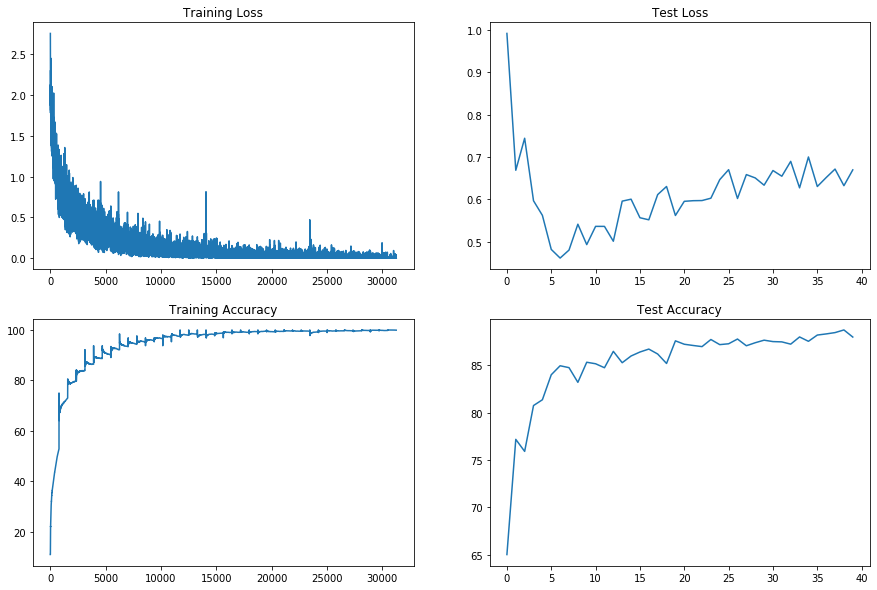

In [9]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


GroundTruth:    cat  ship  ship plane  frog  frog   car  frog


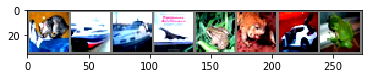

In [10]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(8)))

In [11]:
outputs = model(images.to(device))

In [12]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(8)))

Predicted:    cat  ship  ship plane  frog  frog   car  frog


In [13]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = model(images.to(device))
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 87 %


In [14]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 90 %
Accuracy of   car : 92 %
Accuracy of  bird : 83 %
Accuracy of   cat : 78 %
Accuracy of  deer : 84 %
Accuracy of   dog : 83 %
Accuracy of  frog : 89 %
Accuracy of horse : 88 %
Accuracy of  ship : 93 %
Accuracy of truck : 94 %


In [15]:
use_cuda

True

In [16]:
dataiter = iter(testloader)
images, labels = dataiter.next()

In [24]:
from grad_cam_utils import visualize_cam
from gradcam import GradCAM, GradCAMpp

In [25]:
gradcam  = GradCAM.from_config(model_type='resnet', arch=model, layer_name='layer4')
gradcam_pp = GradCAMpp.from_config(model_type='resnet', arch=model, layer_name='layer4')

In [26]:
dataiter = iter(testloader)
images, labels = dataiter.next()

/home/gauravp/anaconda3/envs/kerasretina/lib/python3.6/site-packages/torch/nn/functional.py:2416: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


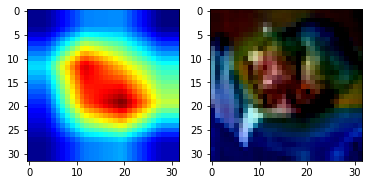

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


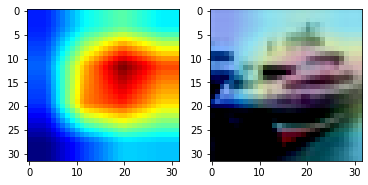

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


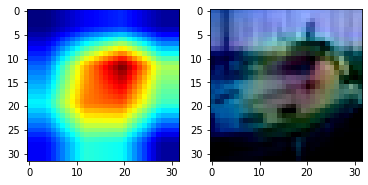

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


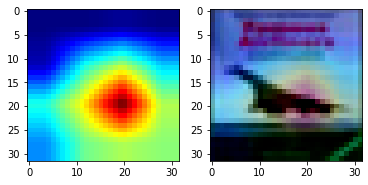

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


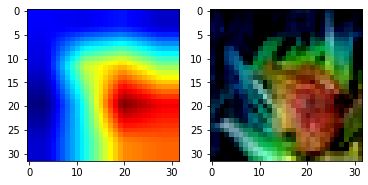

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


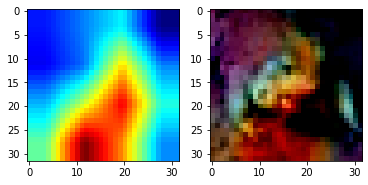

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


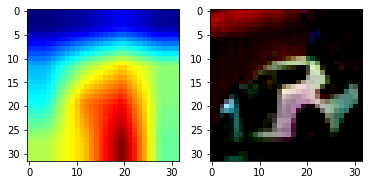

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


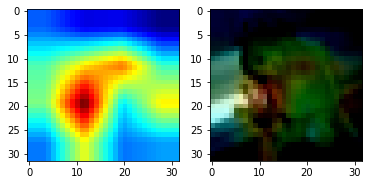

In [27]:
for i in range(8):    
    input_img = images[i]
    input_img = np.expand_dims(input_img, 0)
    input_img = torch.tensor(input_img)
    input_img = input_img.to(device)

    mask, _ = gradcam(input_img)
    heatmap, result = visualize_cam(mask, input_img)
    
    fig, ax = plt.subplots(1, 2)
    tmp_img = np.array(heatmap)
    tmp_img = tmp_img.transpose([1, 2, 0])
    ax[0].imshow(tmp_img)
    
    tmp_img = np.array(result)
    tmp_img = tmp_img.transpose([1, 2, 0])
    ax[1].imshow(tmp_img)
    plt.show()